In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid-19/covid19_Confirmed_dataset.csv
/kaggle/input/covid-19/covid19_deaths_dataset.csv
/kaggle/input/covid-19/worldwide_happiness_report.csv


# Welcome to Covid19 Data Analysis Notebook

# Let's Import the Modules

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
print('Modules are Imported.')

Modules are Imported.


# Task 2

# Task 2.1: importing covid19 dataset


In [3]:
dataset = pd.read_csv("/kaggle/input/covid-19/covid19_Confirmed_dataset.csv")
dataset.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


# Let's check the shape of the dataframe

In [4]:
dataset.shape

(266, 104)

# Task 2.2: Aggregating the rows by the country

In [5]:
dataset_agg = dataset.groupby("Country/Region").sum()
dataset_agg.head()

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,33.0000,65.0000,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,41.1533,20.1683,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,28.0339,1.6596,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,42.5063,1.5218,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,-11.2027,17.8739,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [6]:
dataset_agg.shape

(187, 103)

<Axes: >

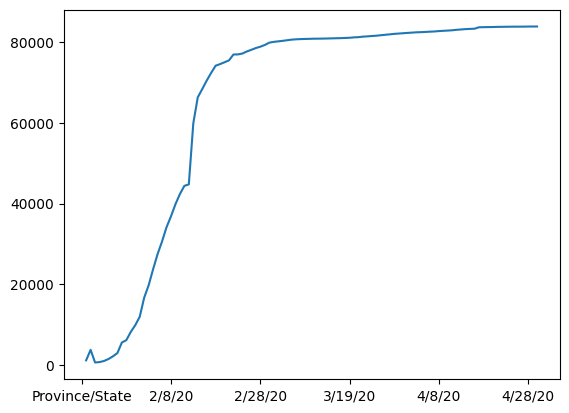

In [7]:
dataset_agg = dataset_agg.apply(pd.to_numeric, errors='coerce')
dataset_agg.loc["China"].plot()

# Task 2.3: Visualizing data related to a country for example China¶

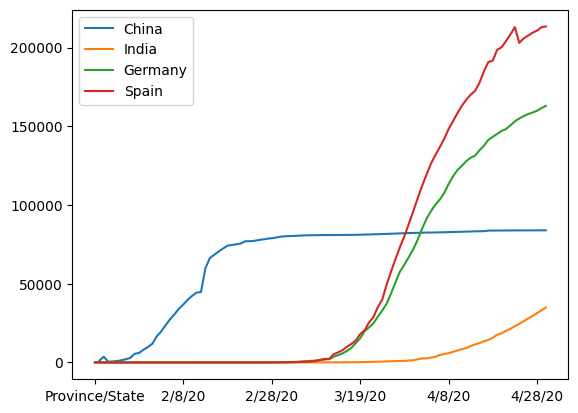

In [8]:
dataset_agg.loc["China"].plot()
dataset_agg.loc["India"].plot()
dataset_agg.loc["Germany"].plot()
dataset_agg.loc["Spain"].plot()
plt.legend() 

# Task3: Calculating a good measure

<Axes: >

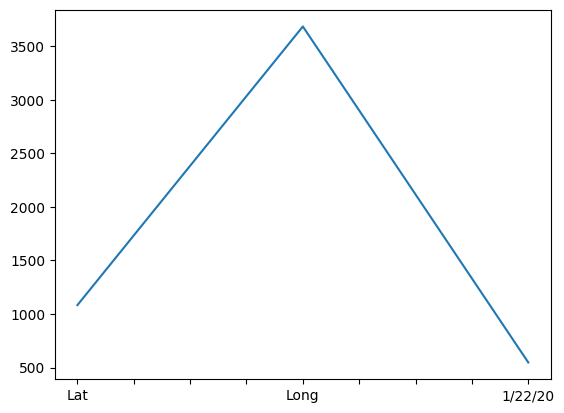

In [9]:
dataset_agg.loc['China'][:4].plot()

# task 3.1: caculating the first derivative of the curve 

<Axes: >

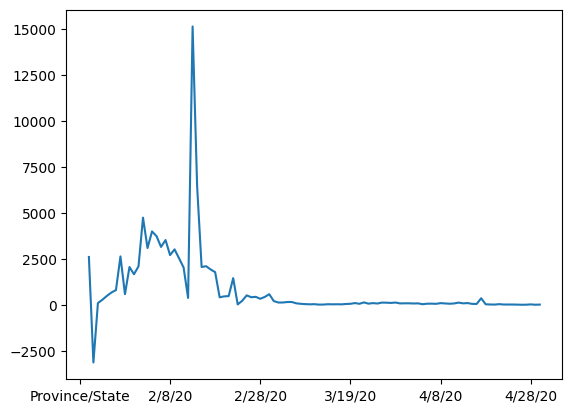

In [10]:
dataset_agg.loc['China'].diff().plot()

# task 3.2: find maxmimum infection rate for China

In [11]:
dataset_agg.loc["China"].diff().max()

15136.0

In [12]:
dataset_agg.loc["India"].diff().max()

1893.0

In [13]:
dataset_agg.loc["Spain"].diff().max()

9630.0

# Task 3.3: find maximum infection rate for all of the countries.

In [14]:
max_rate = []
countries = list(dataset_agg.index)
for c in countries:
    max_rate.append(dataset_agg.loc[c].diff().max())
max_rate
dataset_agg["max_infection_rate"]=max_rate
dataset_agg.head()
    

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,33.0000,65.0000,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0000
Albania,0.0,41.1533,20.1683,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,41.1533
Algeria,0.0,28.0339,1.6596,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0000
Andorra,0.0,42.5063,1.5218,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0000
Angola,0.0,-11.2027,17.8739,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,29.0766


# Task 3.4: create a new dataframe with only needed column

In [15]:
data=pd.DataFrame(dataset_agg["max_infection_rate"])
data.head(5)

,max_infection_rate
Country/Region,
Afghanistan,232.0000
Albania,41.1533
Algeria,199.0000
Andorra,43.0000
Angola,29.0766


# Task4:
1.Importing the WorldHappinessReport.csv dataset
2.selecting needed columns for our analysis
3.join the datasets
4.calculate the correlations as the result of our analysis

# Task 4.1 : importing the dataset

In [16]:
happiness = pd.read_csv("/kaggle/input/covid-19/worldwide_happiness_report.csv")
happiness.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


# Task 4.2: let's drop the useless columns

In [17]:
useless = ["Overall rank","Score","Generosity","Perceptions of corruption"]

In [18]:
happiness.drop(["Overall rank","Score","Generosity","Perceptions of corruption"],axis=1,inplace=True)
happiness.head(5)


,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


# Task 4.3: changing the indices of the dataframe

In [19]:
happiness.set_index("Country or region", inplace=True)

# Corona Dataset:

In [20]:
happiness.shape

(156, 4)

In [21]:
final=data.join(happiness, how="inner")
final.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0000,0.350,0.517,0.361,0.000
Albania,41.1533,0.947,0.848,0.874,0.383
Algeria,199.0000,1.002,1.160,0.785,0.086
Argentina,291.0000,1.092,1.432,0.881,0.471
Armenia,134.0000,0.850,1.055,0.815,0.283


# Task 4.5: correlation matrix

In [22]:
final.corr()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rate,1.000000,0.251168,0.194084,0.291400,0.080686
GDP per capita,0.251168,1.000000,0.759468,0.863062,0.394603
Social support,0.194084,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.291400,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.080686,0.394603,0.456246,0.427892,1.000000


# Task 5: Visualization of the results

In [23]:
final.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0000,0.350,0.517,0.361,0.000
Albania,41.1533,0.947,0.848,0.874,0.383
Algeria,199.0000,1.002,1.160,0.785,0.086
Argentina,291.0000,1.092,1.432,0.881,0.471
Armenia,134.0000,0.850,1.055,0.815,0.283


# Task 5.1: Plotting GDP vs maximum Infection rate

In [24]:
x=final["GDP per capita"]
y=final["max_infection_rate"]


<Axes: xlabel='GDP per capita', ylabel='max_infection_rate'>

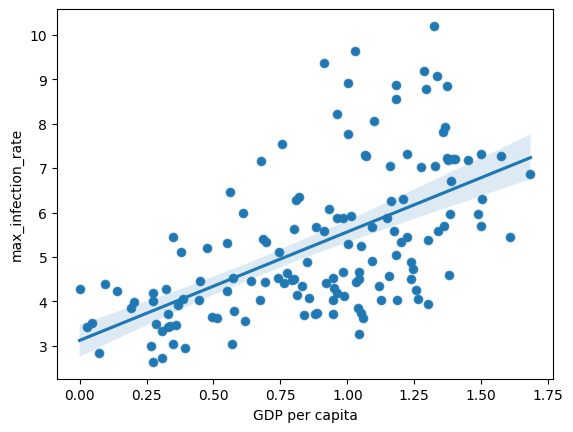

In [25]:
sns.scatterplot(x=x, y=np.log(y))
sns.regplot(x=x, y=np.log(y))

# Task 5.2: Plotting Social support vs maximum Infection rate

<Axes: xlabel='Social support', ylabel='max_infection_rate'>

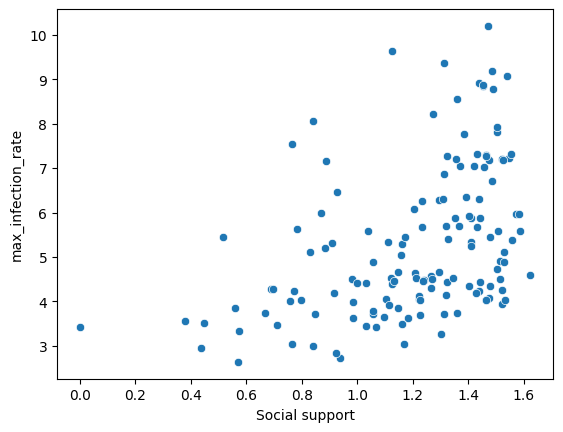

In [26]:

x1 = final["Social support"]
sns.scatterplot(x=x1, y=np.log(y))

<Axes: xlabel='Social support', ylabel='max_infection_rate'>

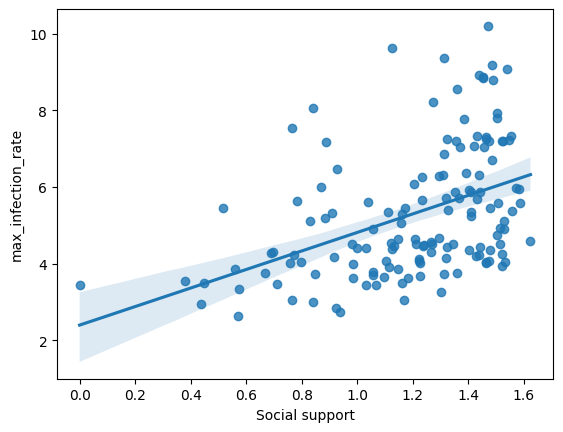

In [27]:
sns.regplot(x=x1, y=np.log(y))

# Task 5.3: Plotting Healthy life expectancy vs maximum Infection rate

<Axes: xlabel='Healthy life expectancy', ylabel='max_infection_rate'>

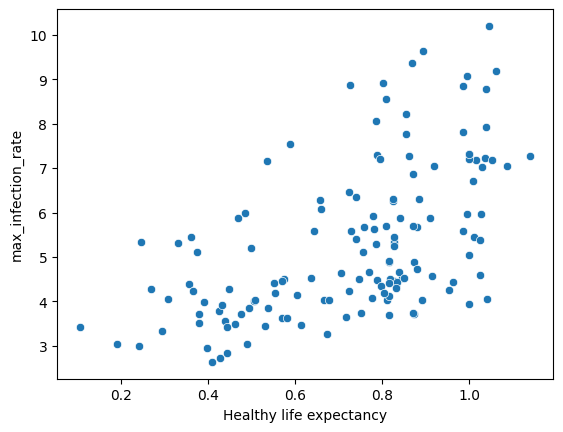

In [28]:
x2=final["Healthy life expectancy"]
sns.scatterplot(x=x2,y=np.log(y))

<Axes: xlabel='Healthy life expectancy', ylabel='max_infection_rate'>

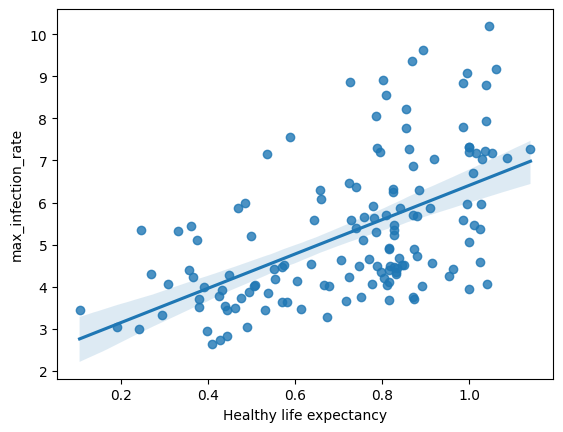

In [29]:
sns.regplot(x=x2,y=np.log(y))

# Task 5.4: Plotting Freedom to make life choices vs maximum Infection rate

<Axes: xlabel='Freedom to make life choices', ylabel='max_infection_rate'>

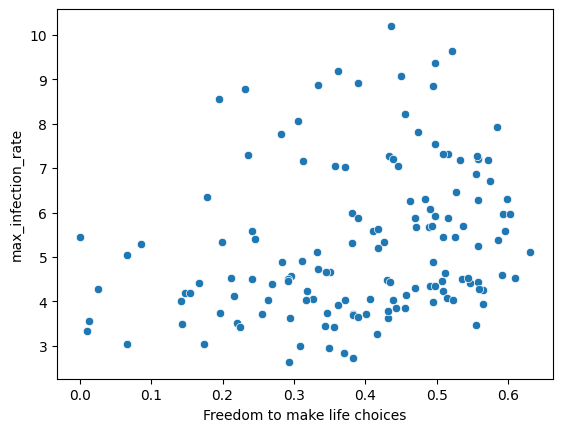

In [30]:
x3=final["Freedom to make life choices"]
sns.scatterplot(x=x3,y=np.log(y))

<Axes: xlabel='Freedom to make life choices', ylabel='max_infection_rate'>

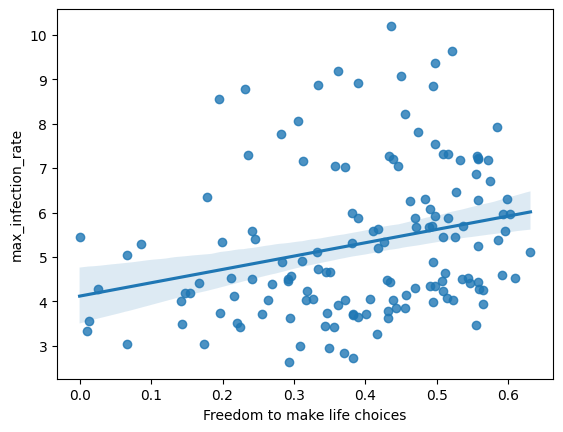

In [31]:
sns.regplot(x=x3,y=np.log(y))